
Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Suppose that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Below is a program that calculates the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Results are plotted for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compared with exact (analytical)
results.

In [1]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [29]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    if i%10==0:
        print (i,i*dt, T)
        if i*dt==10:
            check=T
    # we can also do t = t - r*(t-ts)*dt, it would save some memory and processing time.
    

10 0.625 14.43629514217881
20 1.25 18.602991454377907
30 1.875 22.51647277193668
40 2.5 26.192127265411983
50 3.125 29.64440794828822
60 3.75 32.88688950756334
70 4.375 35.932321680673844
80 5.0 38.79267938864181
90 5.625 41.47920982257208
100 6.25 44.0024766686481
110 6.875 46.37240164552318
120 7.5 48.598303517436094
130 8.125 50.688934736454016
140 8.75 52.65251585792376
150 9.375 54.496767864455826
160 10.0 56.22894252554225
170 10.625 57.85585091218508
180 11.25 59.383890178657595
190 11.875 60.81906871670667
200 12.5 62.167029781104965
210 13.125 63.43307367945071
220 13.75 64.62217861346748
230 14.375 65.73902025375384
240 15.0 66.7879901249527
250 15.625 67.77321287363254
260 16.25 68.69856248677905
270 16.875 69.56767752467047
280 17.5 70.38397542803327
290 18.125 71.15066595573498
300 18.75 71.87076380585317
310 19.375 72.54710046974705
320 20.0 73.18233536574354
330 20.625 73.77896629621604
340 21.25 74.33933926917446
350 21.875 74.8656577229857
360 22.5 75.35999119049718
37

Let's plot the results. We first need to import the required libraries and methods

In [12]:
#%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [13]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [14]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

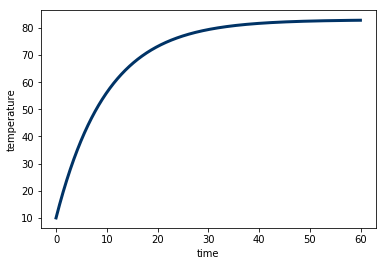

In [15]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [16]:
my_time = np.linspace(0.,tmax,nsteps)

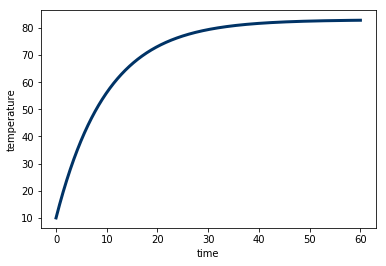

In [17]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [18]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

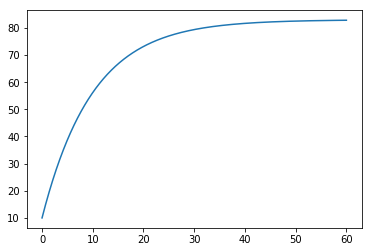

In [21]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
pyplot.plot(my_time,my_temp)

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [20]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence. Notice the initial time step `dt=1`; it is then divided in half in every iteration:

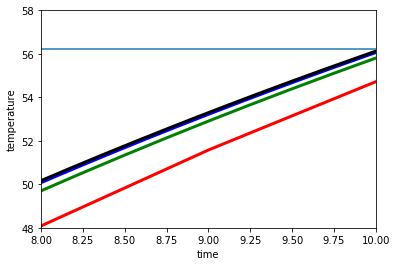

In [46]:
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/4.
pyplot.plot(my_time,check*np.ones([len(my_time),1]))
pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);

Runge-Kutta methods
-------------------

### 2nd order Runge-Kutta

Euler’s method rests on the idea that the slope at one point can be used
to extrapolate to the next. A plausible idea to make a better estimate
of the slope is to extrapolate to a point halfway across the interval,
and then to use the derivative at this point to extrapolate across the
whole interval. Thus,

$$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+\Delta x/2, y_n+k/2) + O(\Delta 
x^3).\end{eqnarray}$$

It has the same accuracy as the Taylor series. It requires
the evaluation of $f$ twice for each step.

### 4th order Runge-Kutta

Similar ideas can be used to derive a 3rd or 4th order Runge-Kutta
method. It has been found by experience that the best balance between
accuracy and computational effort is given by a fourth-order algorithm.
Such a method would require evaluating $f$ four times at each step, with
a local accuracy of $O(\Delta x^5)$. It can be written as follows:
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+\Delta x/2,y_n+k_1/2), \\
 k_3&=&\Delta x f(x_n+\Delta x/2,y_n+k_2/2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$

Runge-Kutta method are self-staring, meaning that they can be used to
obtain the first few iterations for a non self-starting algorithm.

### Newton's Law of Cooling

Using the 4th order Runge-Kutta Methods,

In [23]:
def rk4insteps(T,func,dt):
    k1 = dt*func(T,dt)
    k2 = dt*func(T+0.5*k1,dt)
    k3 =dt*func(T+0.5*k2,dt)
    k4 = dt*func(T+k3,dt)
    T += (k1+2*k2+2*k3+k4)/6
    return T

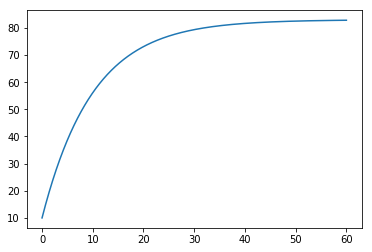

In [24]:
fT = lambda T,t: -r*(T-Ts)
T = T0
dt = 0.05
for i in range(1,nsteps):
    T = rk4insteps(T, fT, dt)
    my_temp[i] = T
pyplot.plot(my_time,my_temp)

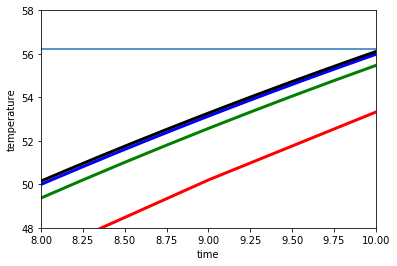

In [45]:
dt = 1
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = rk4insteps(T,fT,dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/4.
pyplot.plot(my_time,check*np.ones([len(my_time),1]))
pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(8,10)
pyplot.ylim(48,58);